In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage import transform
from scipy import signal
%matplotlib inline

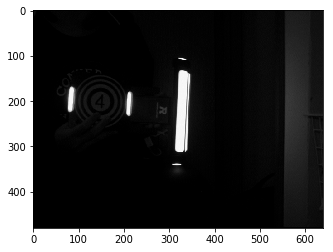

In [41]:
img = imread('./disturb1.png')
img = img.mean(axis=2)
plt.imshow(img, 'gray')

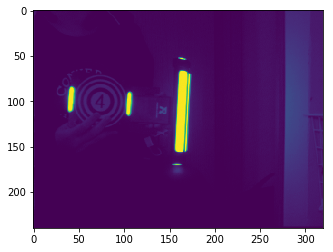

In [84]:
featmap = transform.resize(img, (240, 320))
plt.imshow(featmap)

Text(0.5,1,'false patter')

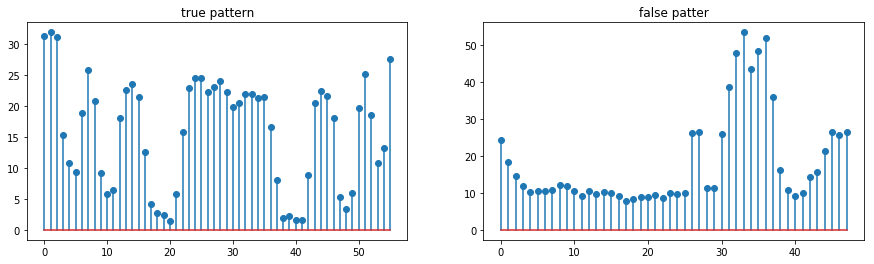

In [96]:
row_true = featmap[108, 45:101]
row_false = featmap[108, 110:158]
plt.figure(figsize=(15, 4))

plt.subplot(121)
plt.stem(row_true)
plt.title('true pattern')

plt.subplot(122)
plt.stem(row_false)
plt.title('false patter')

Text(0.5,1,'fft of signal')

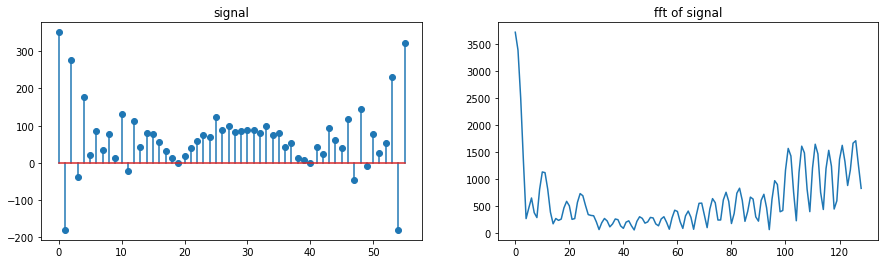

In [102]:
ft = lpf_d
row = signal.convolve(row_true, ft, 'same')
#row = row_true

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.stem(row)
plt.title('signal')

plt.subplot(122)
row_fft = np.fft.rfft(row, 256)
plt.plot(np.absolute(row_fft))
plt.title('fft of signal')

Text(0.5,1,'fft of signal')

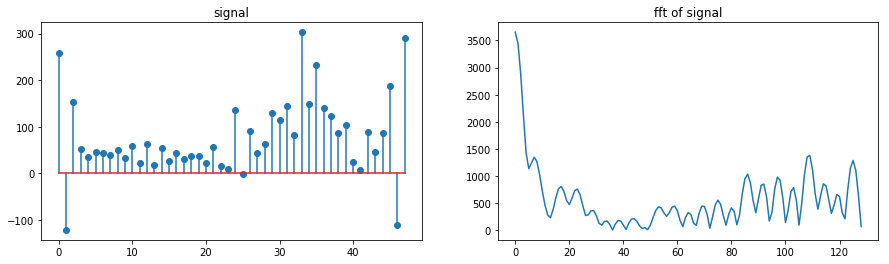

In [103]:
ft = lpf_d
row = signal.convolve(row_false, ft, 'same')
#row = row_false

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.stem(row)
plt.title('signal')

plt.subplot(122)
row_fft = np.fft.rfft(row, 256)
plt.plot(np.absolute(row_fft))
plt.title('fft of signal')

In [39]:
ft = signal.remez?

original filter: [ 0.04269429  0.02853586 -0.29269429  0.46265816 -0.29269429  0.02853586
  0.04269429]
approximated filter: [  3.   2. -19.  30. -19.   2.   3.]


Text(0.5,1,'approximated filter response')

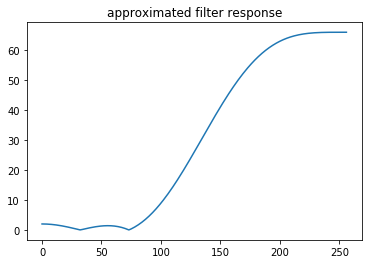

In [104]:
scale = 64
lpf = signal.remez(7, [0, 0.3, 0.8, 1], [0, 1], fs=2)
lpf_d = np.round(lpf * scale)
print("original filter:", lpf)
print("approximated filter:", lpf_d)
lpf_fft = np.fft.rfft(lpf_d, 512)
plt.plot(np.absolute(lpf_fft))
plt.title('approximated filter response')